In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
import random

In [ ]:
def get_date(text):
    matched_date = re.search(r'\d{2} [a-zA-Z]+ \d{4}', text) or re.search(r'\d{1} [a-zA-Z]+ \d{4}', text)
    if matched_date == None:
        return "No Date found.."
    else:
        date_found = datetime.strptime(matched_date.group(), "%d %B %Y").date()
        return date_found

print(get_date("Reviewed in India 🇮🇳 on 8 October 2022"))
print(type(get_date("Reviewed in India 🇮🇳 on 8 October 2022")))

"Rating(Out of 5)"

In [3]:
plt.rcParams["figure.figsize"] = [17, 7]
plt.rcParams["figure.autolayout"] = True

In [53]:
df = pd.read_csv('Xiaomi 12 Pro(Visited on January 31 2023, 15-16-29).csv')
df.head()

,Customer Name,Variant,Rating(Out of 5),Rating,Date of Review,Comment,Review,Images attatched by Customer,Votes on the Review
0,Pravin M,"Size: 8GB RAM, 256GB StorageColour: Opera Muave",5.0,⭐⭐⭐⭐⭐,Reviewed in India 🇮🇳 on 19 August 2022,Excellent device!,The media could not be loaded.\n ...,https://images-na.ssl-images-amazon.com/images...,498 people found this helpful
1,Prime User,"Size: 8GB RAM, 256GB StorageColour: Noir Black",3.0,⭐⭐⭐,Reviewed in India 🇮🇳 on 6 June 2022,"Almost a flagship, but with lot of sacrifices ...",The ratings i gave are considering other flags...,Not Available,311 people found this helpful
2,Devanandan K V,"Size: 8GB RAM, 256GB StorageColour: Couture Blue",4.0,⭐⭐⭐⭐,Reviewed in India 🇮🇳 on 5 December 2022,Detailed Review after 2 months of use,1. Look & Feel: 10/10. Good look device with a...,Not Available,60 people found this helpful
3,Steve,"Size: 8GB RAM, 256GB StorageColour: Couture Blue",4.0,⭐⭐⭐⭐,Reviewed in India 🇮🇳 on 16 January 2023,WhatsApp video problem,Overall it's a good quality phone. The outer l...,Not Available,2 people found this helpful
4,Shree,"Size: 8GB RAM, 256GB StorageColour: Couture Blue",4.0,⭐⭐⭐⭐,Reviewed in India 🇮🇳 on 20 January 2023,All rounder and worth for money,Full satisfied with no compromises with this p...,Not Available,One person found this helpful


In [54]:
df2 = pd.DataFrame().assign(Date = df["Date of Review"], Rating = df["Rating(Out of 5)"])
i = 0
for date in df2["Date"]:
    df2["Date"][i] = get_date(date)
    i = i + 1
# Backup..
df3 = df2
df2

<ipython-input-54-75c89958d1d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Date"][i] = get_date(date)


,Date,Rating
0,2022-08-19,5.0
1,2022-06-06,3.0
2,2022-12-05,4.0
3,2023-01-16,4.0
4,2023-01-20,4.0
...,...,...
998,2022-10-04,5.0
999,2022-08-28,5.0
1000,2022-09-15,5.0
1001,2022-10-08,5.0


In [21]:
df2['Date'] = pd.to_datetime(df2.Date, format='%Y-%m-%d')

In [16]:
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d')   # Not to use..

In [23]:
df2['year'] = df2.Date.dt.year
df2['date'] = df2.Date.dt.strftime('%m-%d')

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df2)

In [ ]:
df3 = df2[0:100]
df3.plot(x='Date')    # Not working..

In [55]:
df2['Date'] = pd.to_datetime(df2.Date, format='%Y-%m-%d')
#df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d')
df2['Month'] = df2['Date'].dt.strftime('%m-%Y')
df2

,Date,Rating,Month
0,2022-08-19,5.0,08-2022
1,2022-06-06,3.0,06-2022
2,2022-12-05,4.0,12-2022
3,2023-01-16,4.0,01-2023
4,2023-01-20,4.0,01-2023
...,...,...,...
998,2022-10-04,5.0,10-2022
999,2022-08-28,5.0,08-2022
1000,2022-09-15,5.0,09-2022
1001,2022-10-08,5.0,10-2022


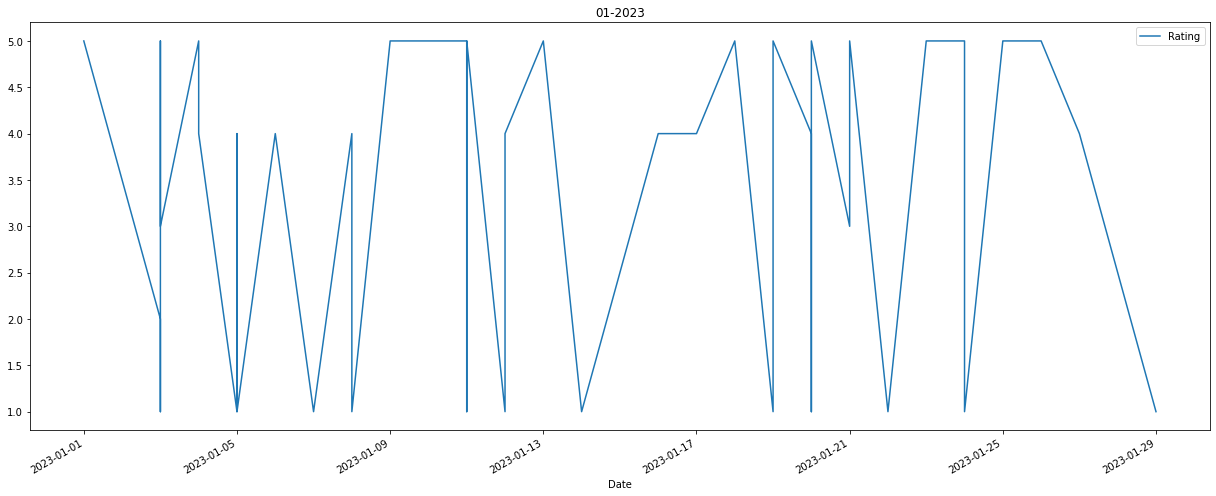

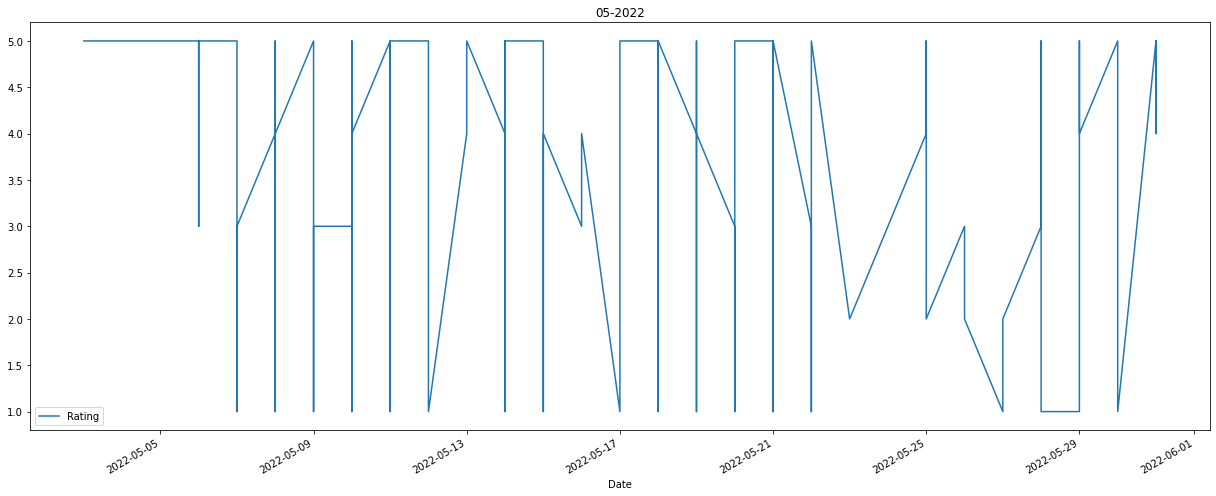

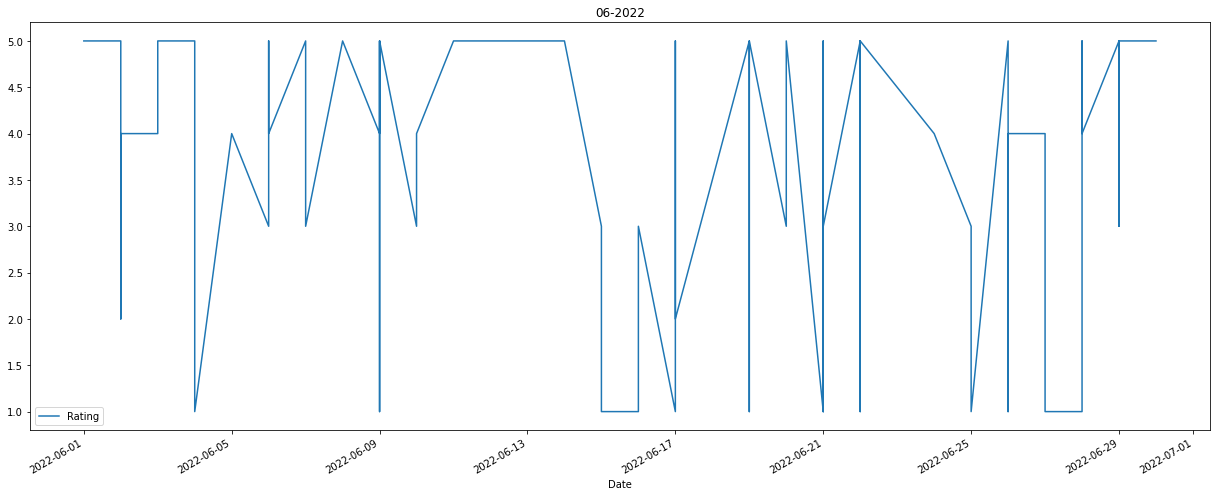

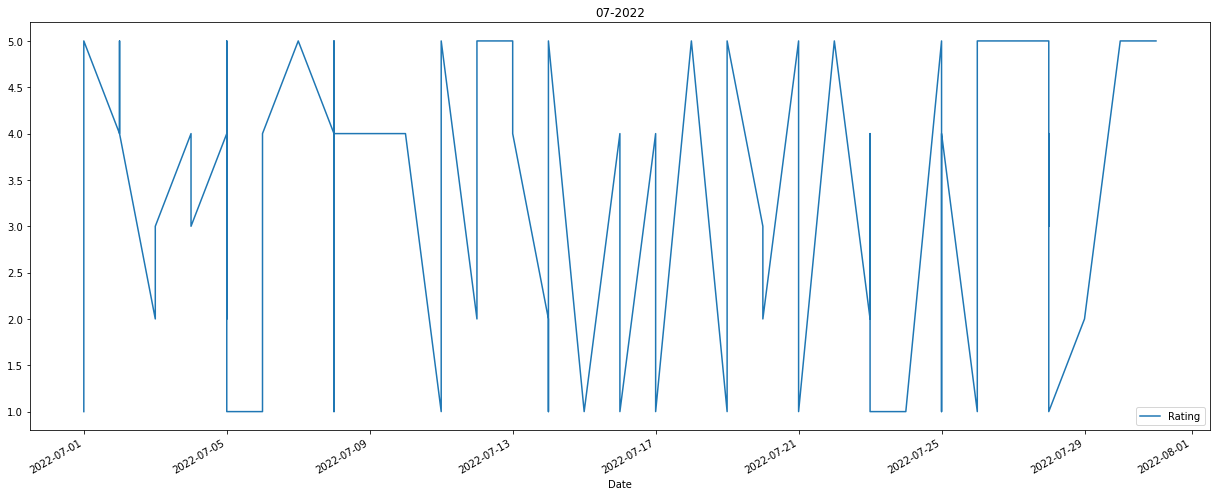

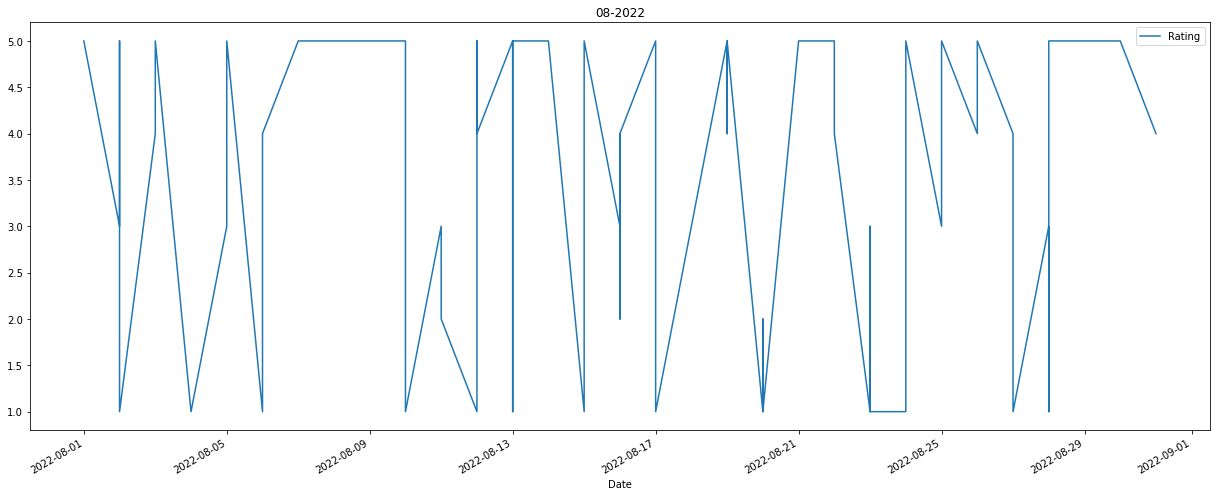

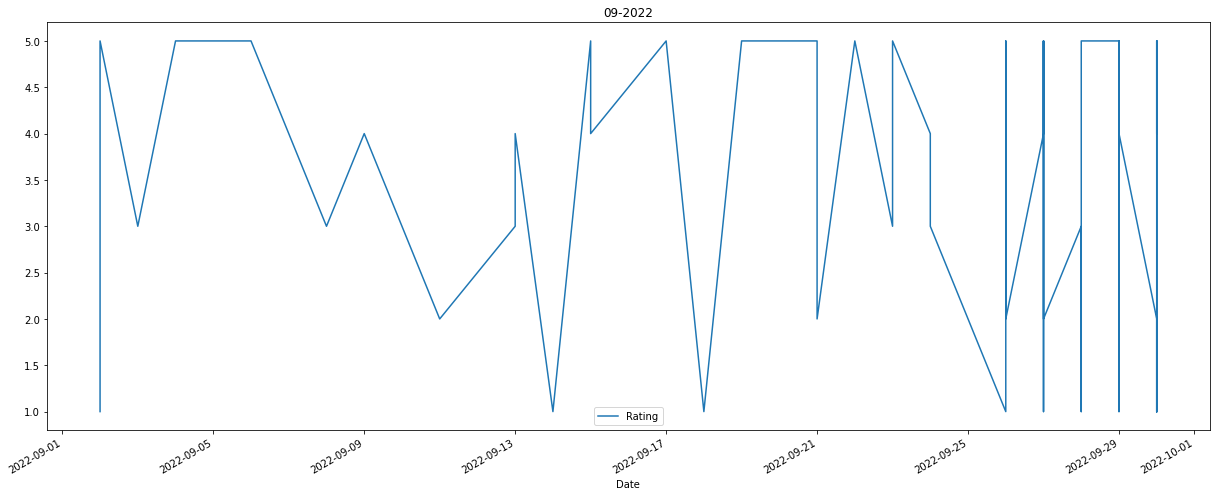

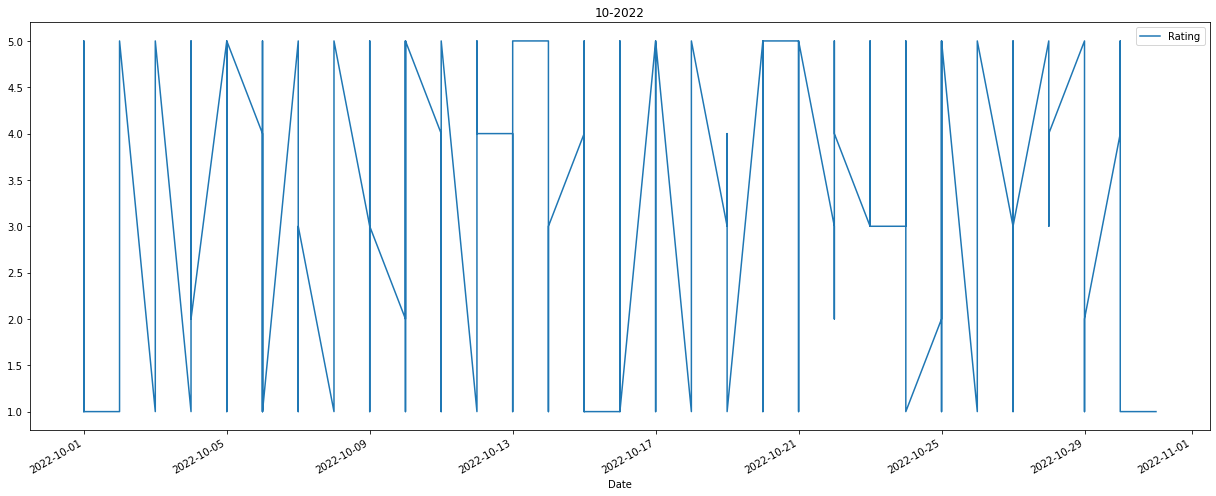

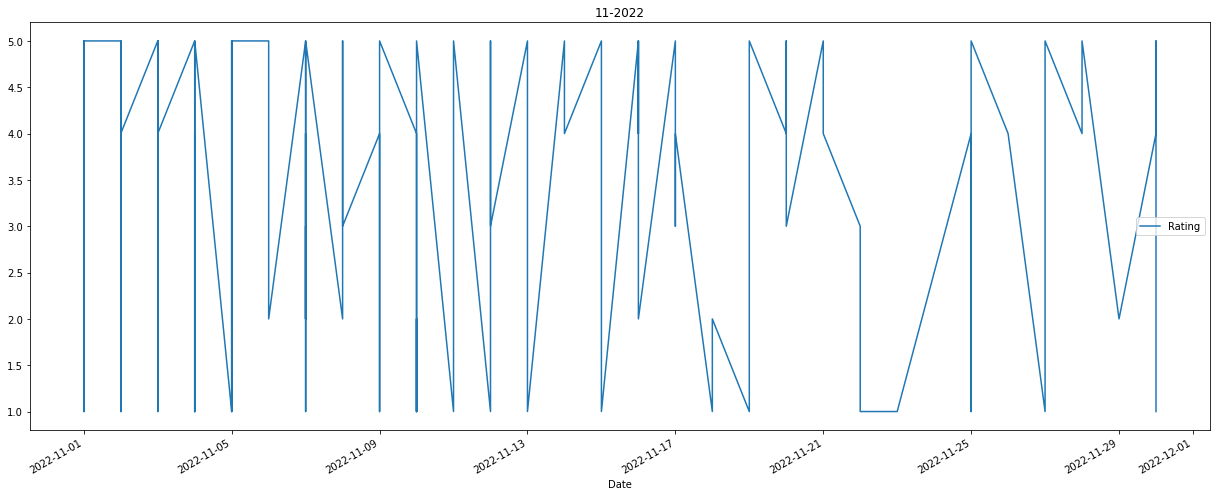

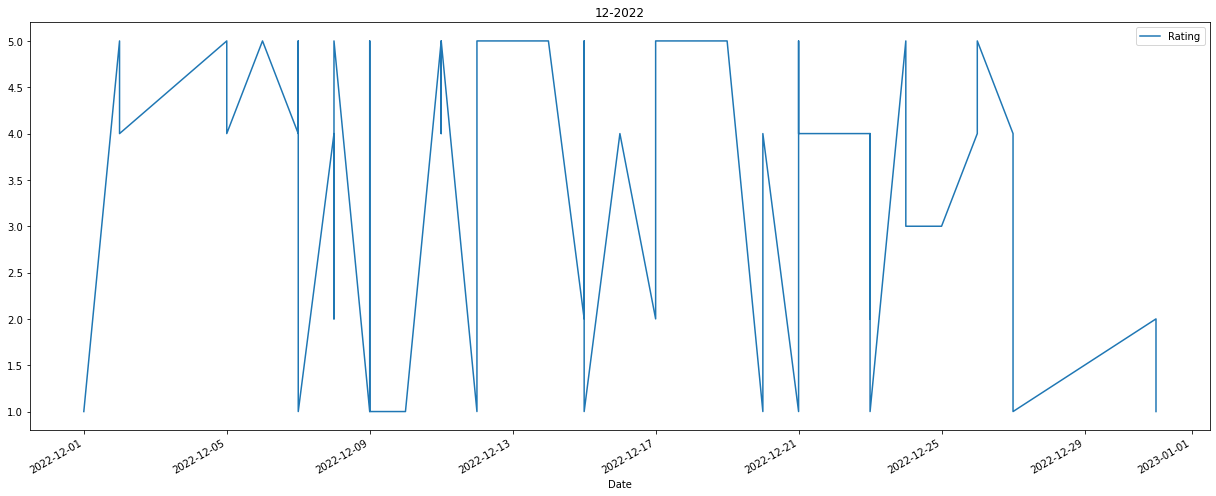

In [56]:
grouped = df2.groupby(['Month'])
for key, group in grouped:
    group.set_index('Date')[['Rating']].plot(title = key)

In [47]:
df2

,Date,Rating
0,2022-08-19,5.0
1,2022-06-06,3.0
2,2022-12-05,4.0
3,2023-01-16,4.0
4,2023-01-20,4.0
...,...,...
998,2022-10-04,5.0
999,2022-08-28,5.0
1000,2022-09-15,5.0
1001,2022-10-08,5.0


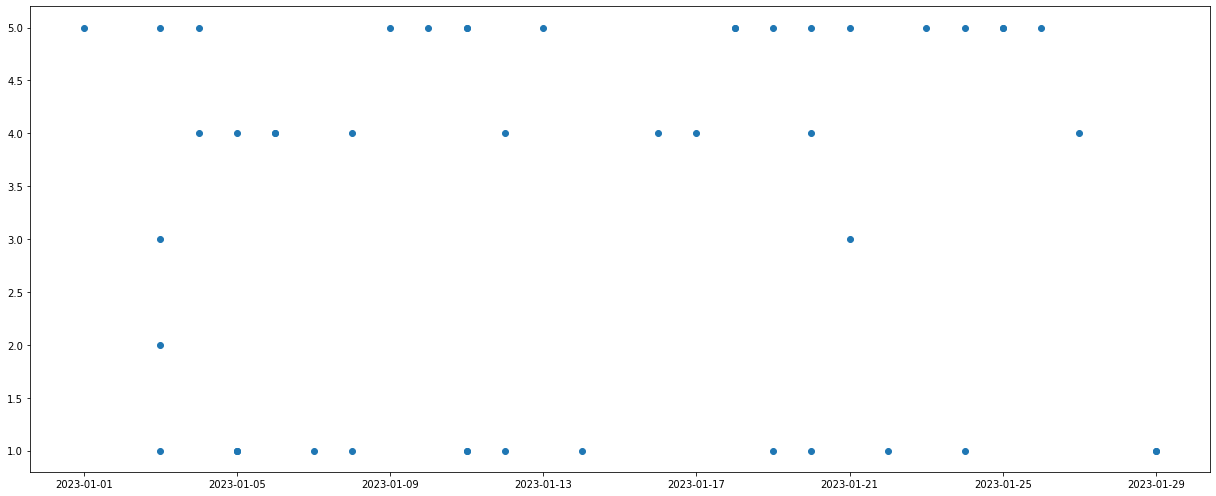

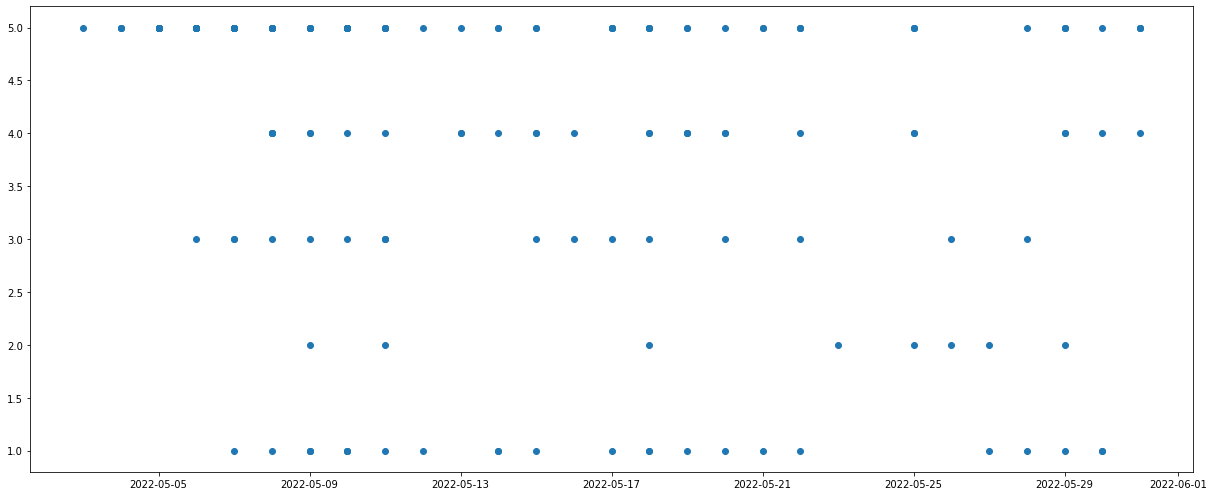

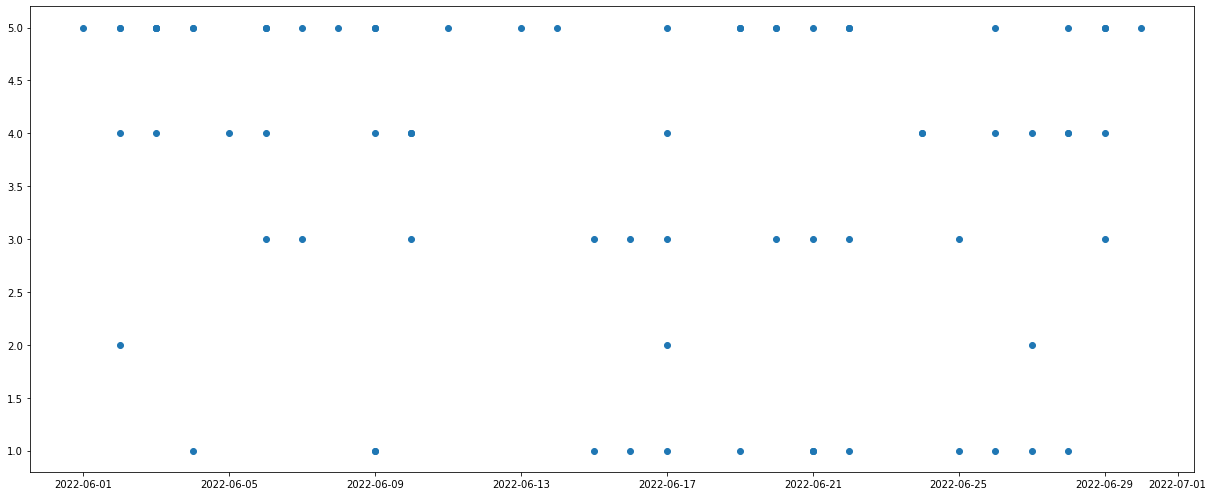

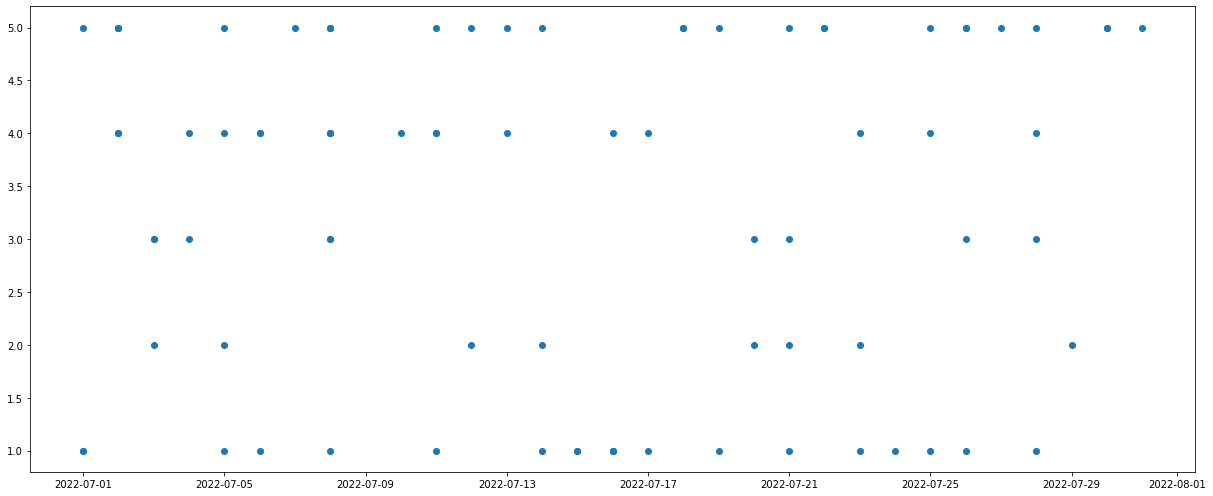

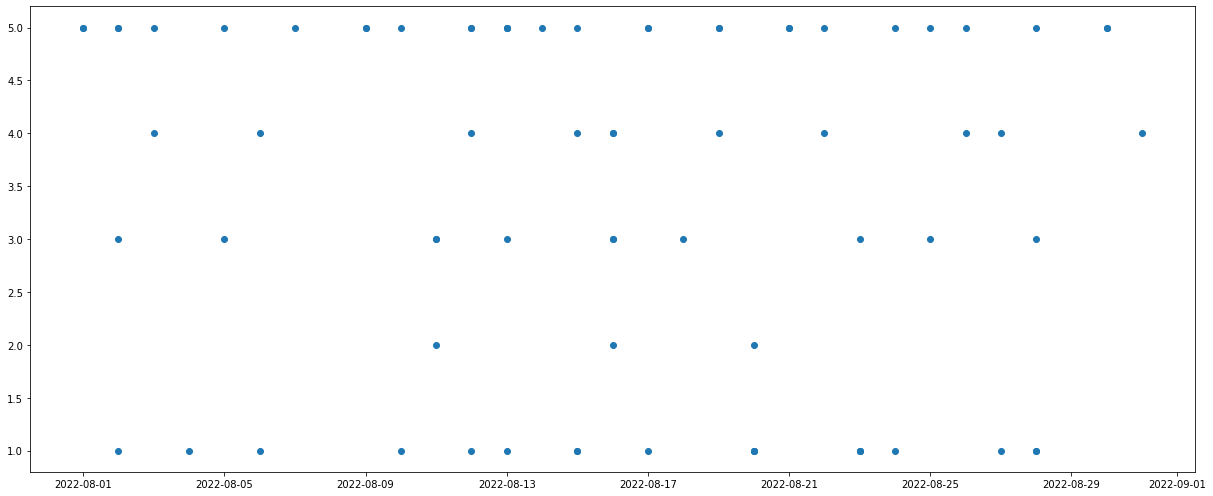

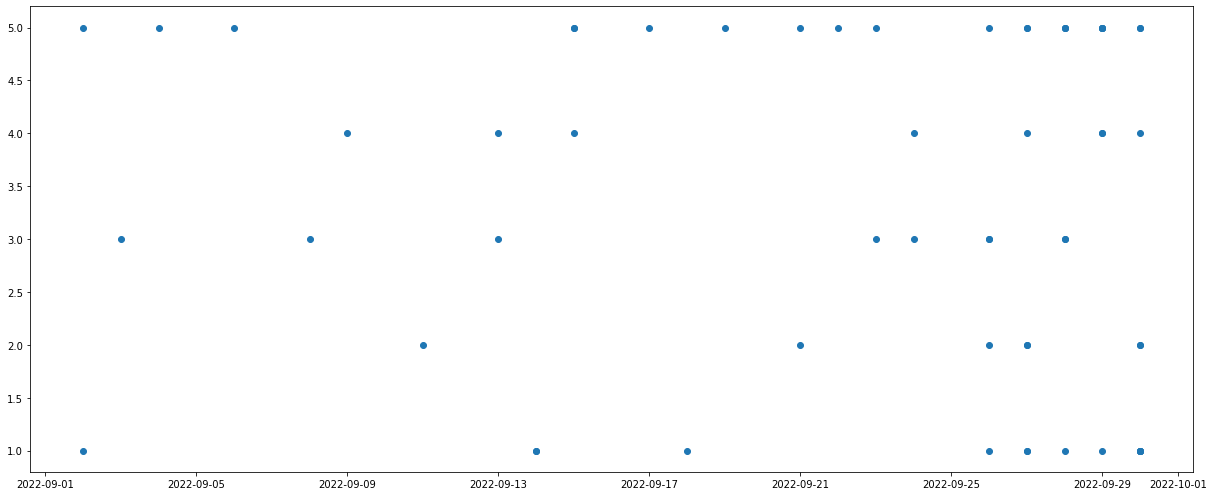

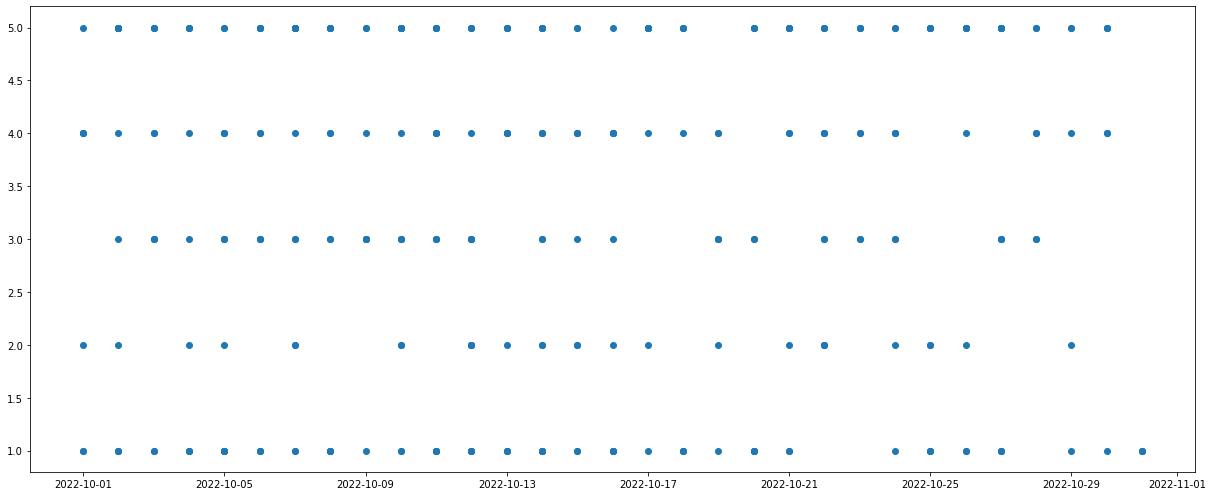

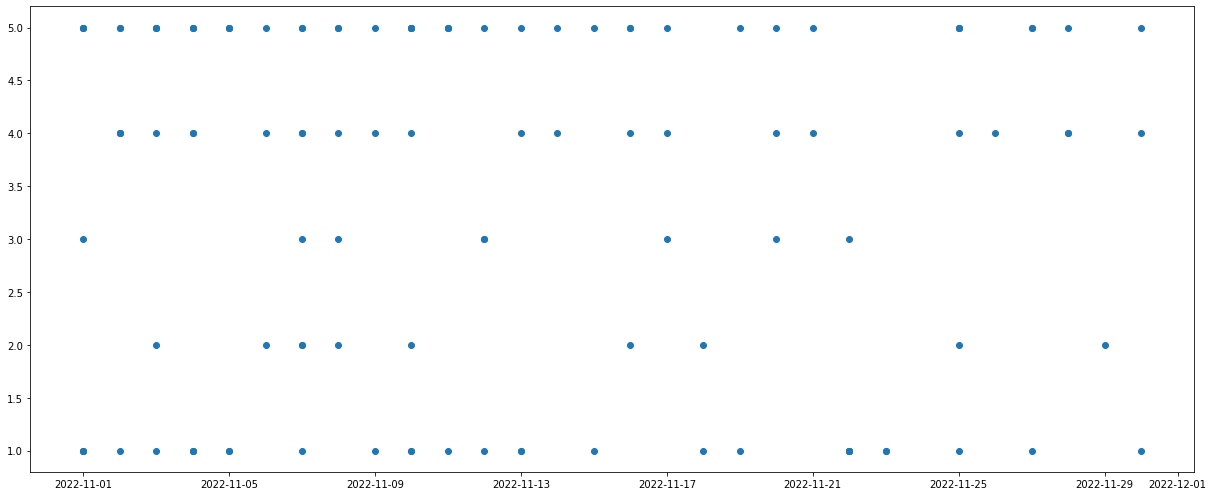

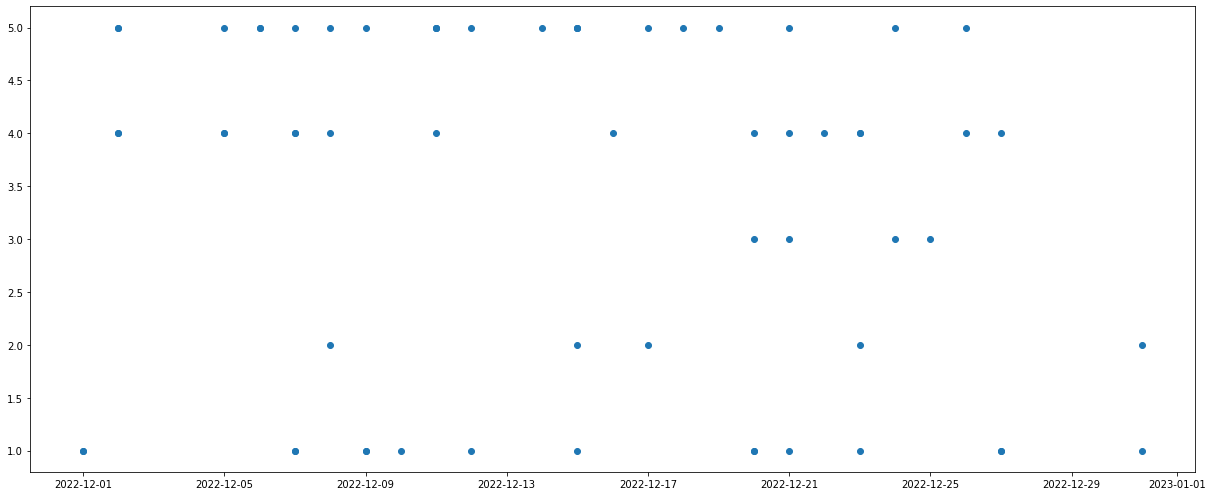

In [66]:
"""for group in grouped:
    print(group)
    break"""
#df3 = df2
#df3.set_index('Date', inplace=True)
#df3.groupby('Month')['Rating'].plot(legend=True)

# Sort values..
df3.sort_values(by="Date", ascending = True, inplace = True) 
grouped = df3.groupby(['Month'])
for key, group in grouped:
    #group.set_index('Date')[['Rating']]#.plot(title = key)
    plt.scatter(group.Date, group.Rating)
    plt.show()

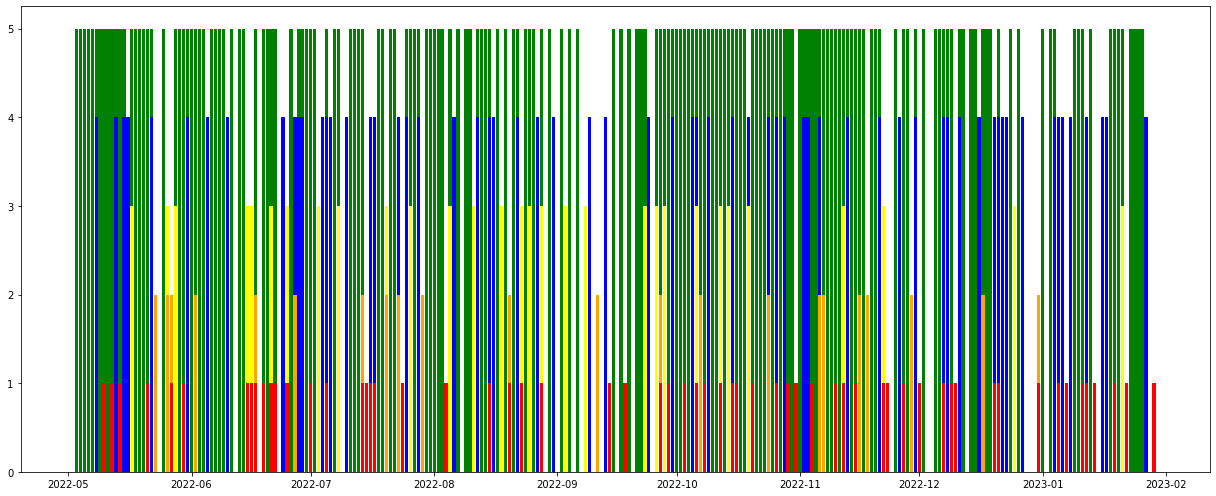

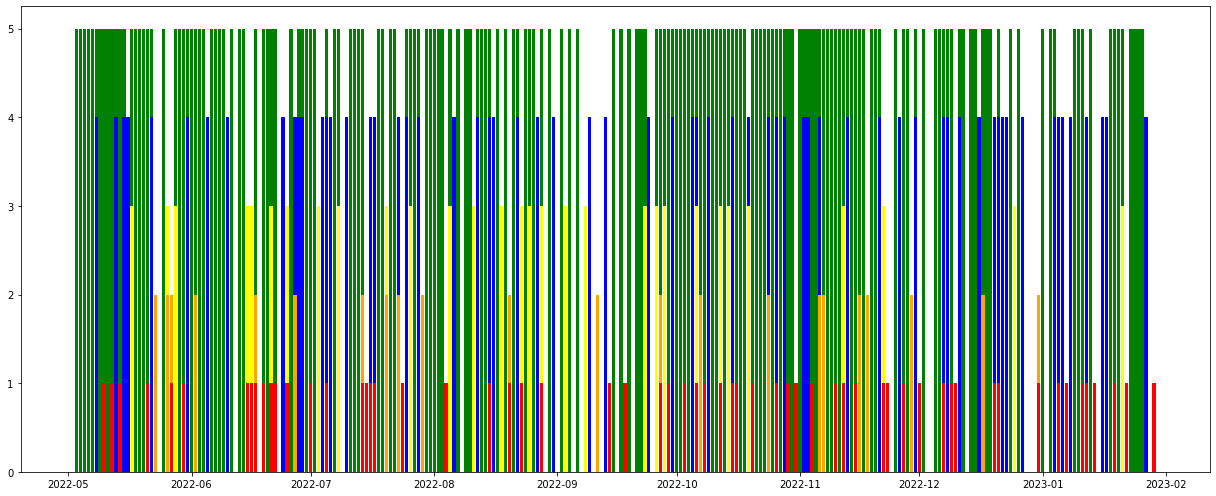

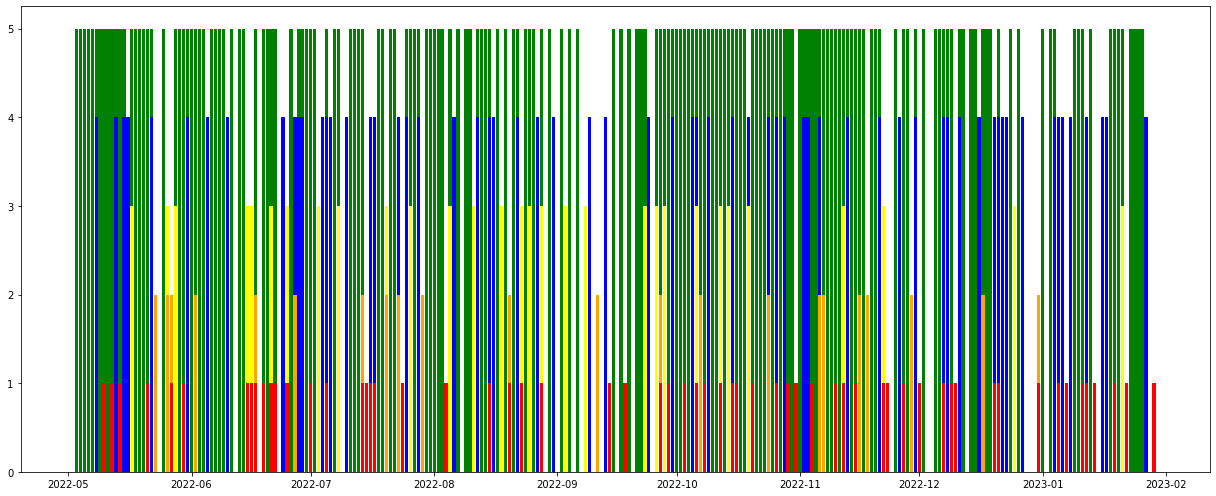

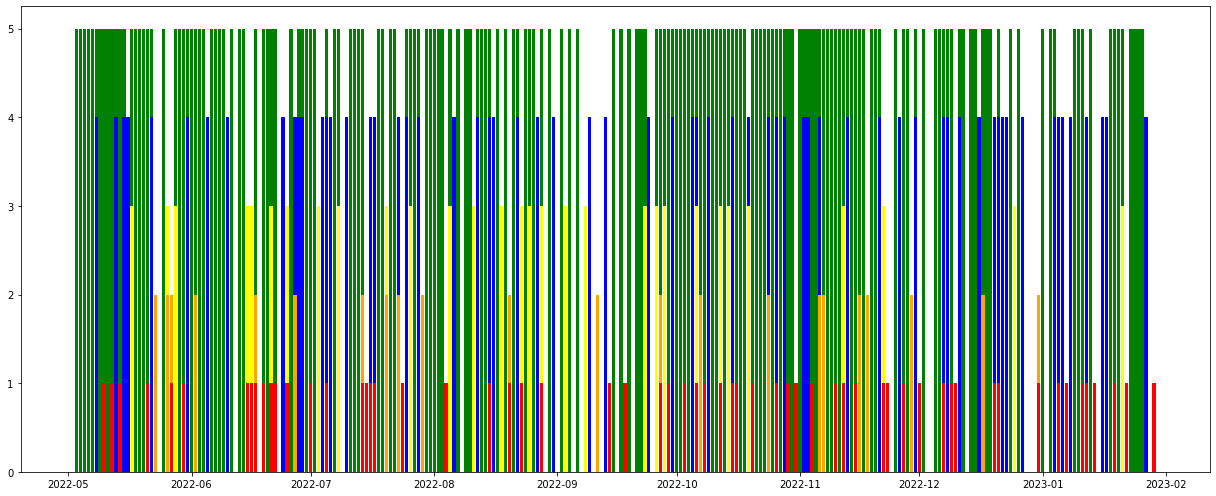

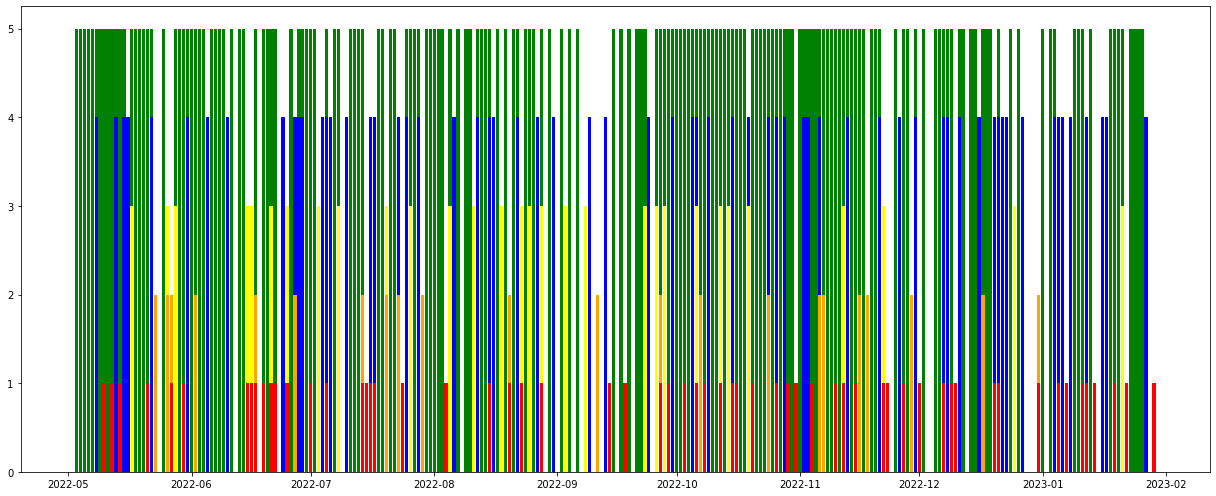

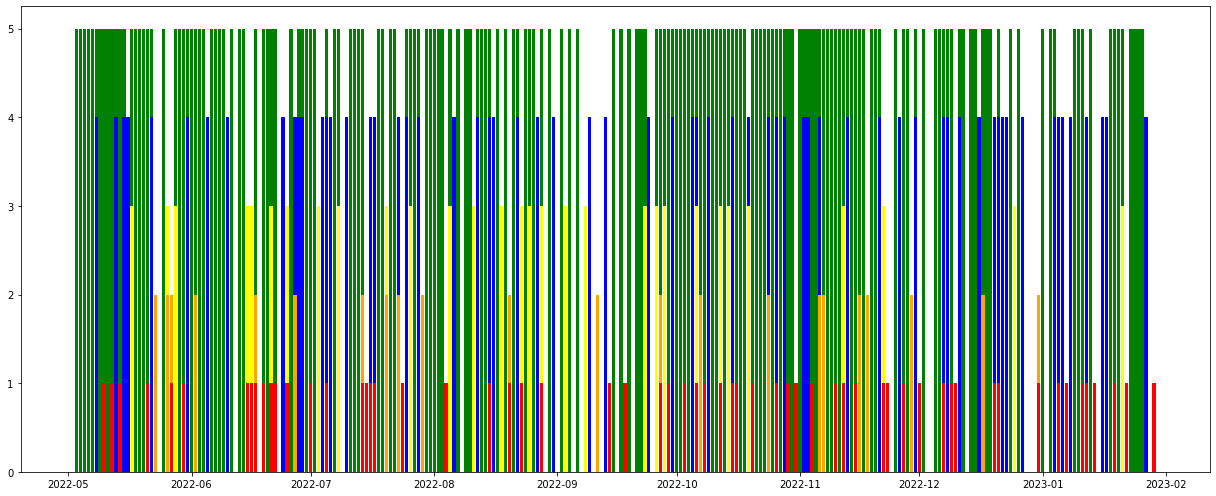

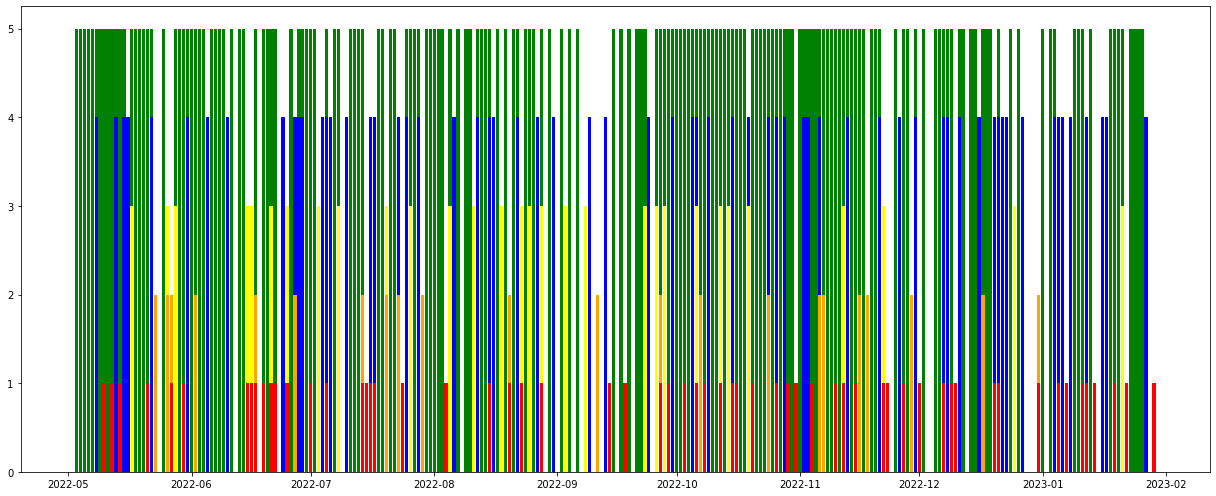

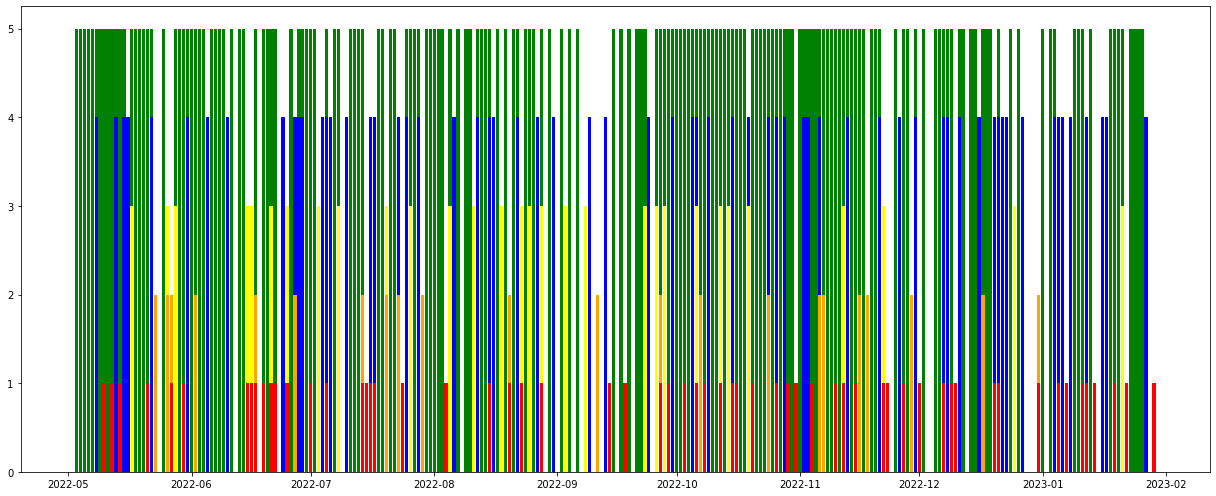

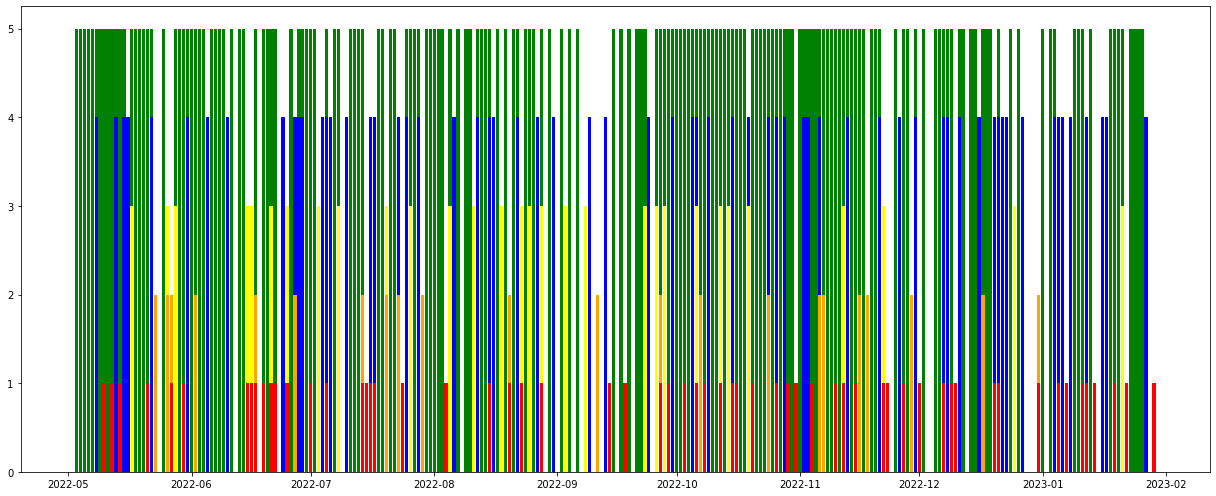

In [71]:
grouped = df2.groupby(['Month'])
rating_color = [{r == 1: 'red', r == 2: 'orange', r == 3: 'yellow', r == 4: 'blue', r == 5: 'green'}[True] for r in df2.Rating]
for key, group in grouped:
    #group.set_index('Date')[['Rating']].plot(kind = 'bar', title = key)
    plt.bar(df2.Date, df2.Rating, color=rating_color)
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe451b26b20>,
      dtype=object)

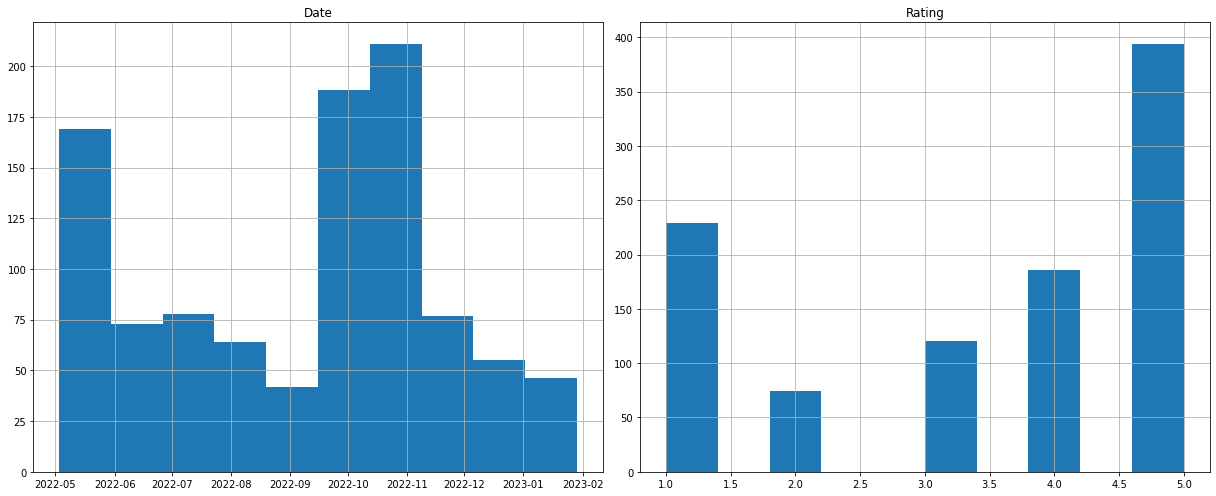

In [59]:
df2.hist()

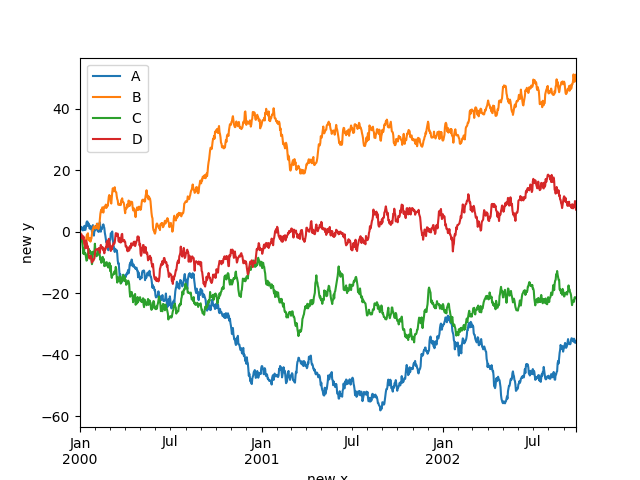